In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 'large',
    'figure.dpi': 100,
})

In [3]:
# Import all measurements from the `./measurements` directory. Each measurement file
# is read into a numpy array (column-first) and added to the `meas_dict` (keys are
# filenames with extentions removed).
meas_dir = os.fsencode('./measurements')
meas_dict = {}
for fname in os.listdir(meas_dir):
    with open(os.path.join(meas_dir, fname)) as file:
        meas = [[float(el) for el in row.rstrip().split('\t')]
                for row in file.readlines()[12:]]
        meas_name = os.fsdecode(fname).removesuffix('.txt')
        meas_dict[meas_name] = np.array(meas).T

In [4]:
# Returns an intersection of two lines of ax + by + c = 0, given by
# coefficient touples l_1 and l_2. If no intersection, returns None.
def ll_intersect(l_1, l_2):
    a, b, c = l_1
    α, β, γ = l_2
    try:
        x, y = np.linalg.solve(
            np.array([[a, b], [α, β]]),
            -np.array([c, γ]))
    except:
        return None
    return x, y

In [5]:
def d_format(d):
    if d == 'off':
        return 'brez LED'
    return f'$d = {d}' + (d != 0)*'\,\mathrm{{mm}}' + '$'

In [156]:
fig, axs = plt.subplots(3, 2, figsize=[6, 9])

for d, ax, color in zip([0, 10, 20, 40, 'off'][::-1],
                        axs.flatten(),
                        ['blue', 'orange', 'green', 'red', 'purple']):
    pts = meas_dict[f'characteristic-{d}']
    pts = pts[:,np.argsort(pts[0])]
    U, I = pts
    ax.plot(U, 1e3 * I, marker='.', color=f'tab:{color}')
    
    # Labels and style.
    ax.set_title(f'Z napajanjem, {d_format(d)}')
    ax.set_xlabel(r'$U\,[\mathrm{V}]$')
    ax.set_ylabel(r'$I\,[\mathrm{\mu A}]$')
    ax.set_xlim(-4, 1)
    I_0 = I[np.argmin(np.abs(U))]
    ax.set_ylim(1e3 * I_0 - 2, 1e3 * I_0 + 8)

U, I = meas_dict['characteristic-0']
U_0 = U[np.argmin(np.abs(U))]
I_0 = I[np.argmin(np.abs(U))]
axs[2,0].scatter(U_LED, 1e3 * I_LED, zorder=4, marker='.', color='tab:red')
fig.delaxes(axs[2, 1])
fig.tight_layout()
fig.savefig('characteristic-split.pdf')

In [166]:
# Need to convert as current is in milliamps elswhere
I_0 = 1e-3 * -I[np.argmin(np.abs(U))]
ΔI_0 = 1e-3 * -I[np.argmin(np.abs(U)) -1] - I_0

χ, Δχ = 0.45, 0.01
ν, Δν = 0.75, 0.1
U_LED, ΔU_LED = 1.87, 0.01
I_LED, ΔI_LED = 23.30e-3, 0.05e-3

η = I_0 / (χ*ν * U_LED*I_LED)
Δη = np.sqrt(
    (1 / (χ*ν * U_LED*I_LED) * ΔI_0)**2 +
    (-I_0 / (χ**2 * ν * U_LED*I_LED) * Δχ)**2 +
    (-I_0 / (χ * ν**2 * U_LED*I_LED) * Δν)**2 +
    (-I_0 / (χ*ν * U_LED**2 * I_LED) * ΔU_LED)**2 +
    (-I_0 / (χ*ν * U_LED * I_LED**2) * ΔI_LED)**2
)
η, Δη

(0.0524193036992835, 0.007092104889301332)

In [124]:
fig, ax = plt.subplots(1, 1, figsize=[5, 5])

# Magnetisation curve.
for d in [0, 10, 20, 40, 'off'][::-1]:
    pts = meas_dict[f'characteristic-{d}']
    pts = pts[:,np.argsort(pts[0])]
    U, I = pts
    ax.plot(U, I, marker='.', label=d_format(d))

# Labels and style.
ax.set_title('Z napajanjem')
ax.set_xlabel(r'$U\,[\mathrm{V}]$')
ax.set_ylabel(r'$I\,[\mathrm{mA}]$')
ax.set_xlim(-4, 1)
ax.legend()
fig.savefig('characteristic.pdf')

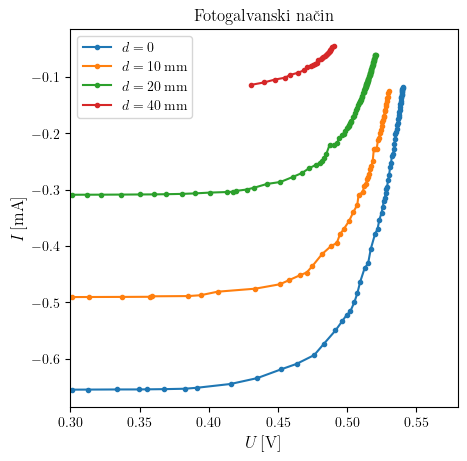

In [48]:
fig, ax = plt.subplots(1, 1, figsize=[5, 5])

# Magnetisation curve.
for d in [0, 10, 20, 40]:
    pts = meas_dict[f'photogalvanic-{d}']
    pts = pts[:,np.argsort(pts[0])]
    U, I = pts
    ax.plot(U, I, marker='.', label=(f'$d = {d}' + (d != 0)*'\,\mathrm{{mm}}' + '$'))

# Labels and style.
ax.set_title('Fotogalvanski način')
ax.set_xlabel(r'$U\,[\mathrm{V}]$')
ax.set_ylabel(r'$I\,[\mathrm{mA}]$')
ax.set_xlim(0.3, 0.58)
ax.legend()
fig.savefig('photogalvanic.pdf')